# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-06-26 22:40:20--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  22.4MB/s    用时 0.4s    

2023-06-26 22:40:21 (22.4 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



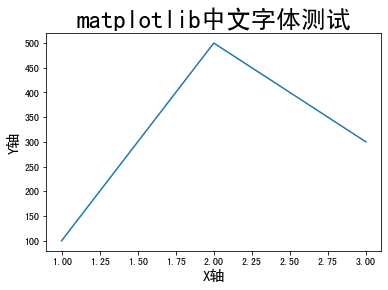

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
os.chdir('mmsegmentation')

In [6]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程20230625/mmsegmentation'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [24]:
# 日志文件路径
log_path = 'work_dirs/ZihaoDataset-PSPNet/20230626_212605/vis_data/scalars.json'

In [25]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [26]:
len(json_list)

481

In [27]:
eval(json_list[4])

{'lr': 0.009911076035273796,
 'data_time': 0.021706581115722656,
 'loss': 0.21840325742959976,
 'decode.loss_ce': 0.15459744557738303,
 'decode.acc_seg': 74.4140625,
 'aux.loss_ce': 0.06380581334233285,
 'aux.acc_seg': 74.468994140625,
 'time': 0.07591071128845214,
 'iter': 400,
 'memory': 1253,
 'step': 400}

In [28]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [29]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009998,0.059432,0.529843,0.367664,30.419922,0.162179,18.249512,0.111611,12.0,18073.0,12.0
1,0.009978,0.028763,0.397594,0.292626,67.413330,0.104968,70.654297,0.079248,100.0,1253.0,100.0
2,0.009956,0.023965,0.298365,0.213780,80.255127,0.084585,93.334961,0.077613,200.0,1253.0,200.0
3,0.009933,0.021567,0.197069,0.135570,96.539307,0.061499,94.458008,0.074682,300.0,1253.0,300.0
4,0.009911,0.021707,0.218403,0.154597,74.414062,0.063806,74.468994,0.075911,400.0,1253.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...
396,0.000257,0.022788,0.088543,0.062395,96.508789,0.026149,96.740723,0.076967,39600.0,1707.0,39600.0
397,0.000221,0.005444,0.104902,0.073584,90.966797,0.031318,84.173584,0.058973,39700.0,1253.0,39700.0
398,0.000184,0.033020,0.059059,0.040043,93.212891,0.019015,93.115234,0.084932,39800.0,1253.0,39800.0
399,0.000145,0.005847,0.105669,0.073338,86.346436,0.032331,85.833740,0.060185,39900.0,1253.0,39900.0


In [30]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,76.89,30.53,42.74,38.99,46.79,70.41,42.74,0.031172,0.675148,500.0
1,81.08,32.50,39.04,40.53,48.64,79.66,39.04,0.009990,0.103555,1000.0
2,87.09,47.87,55.53,56.26,67.51,84.44,55.53,0.011889,0.105061,1500.0
3,85.16,45.11,54.14,53.30,63.96,83.02,54.14,0.008598,0.100891,2000.0
4,88.83,50.44,56.83,59.87,71.84,88.10,56.83,0.009483,0.101862,2500.0
...,...,...,...,...,...,...,...,...,...,...
74,93.49,69.86,81.29,80.53,80.53,80.66,81.29,0.007882,0.101693,37500.0
75,94.10,70.17,81.90,80.52,80.52,79.39,81.90,0.006962,0.098096,38000.0
76,94.18,71.00,81.37,81.40,81.40,81.78,81.37,0.008896,0.101164,38500.0
77,94.15,71.08,84.56,81.40,81.40,78.76,84.56,0.008546,0.102100,39000.0


## 导出训练日志表格

In [31]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [32]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [33]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

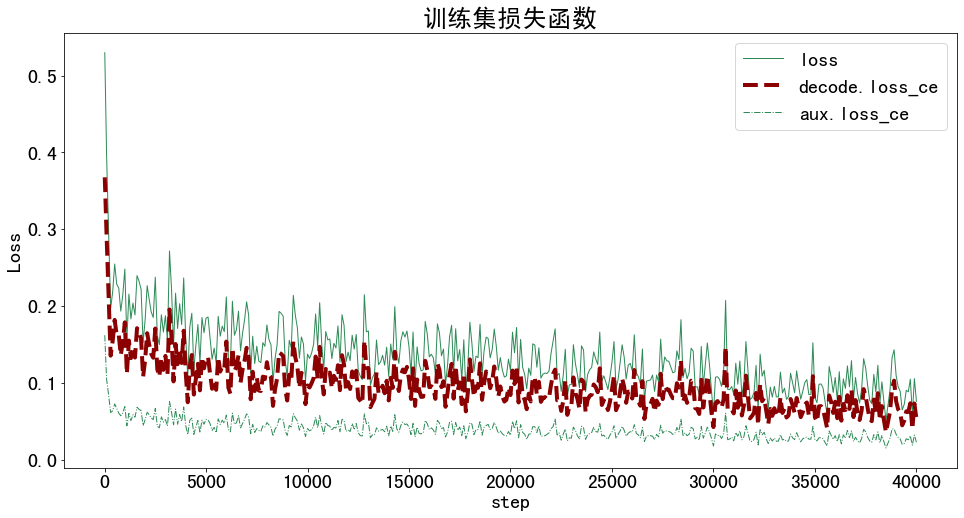

In [34]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [35]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

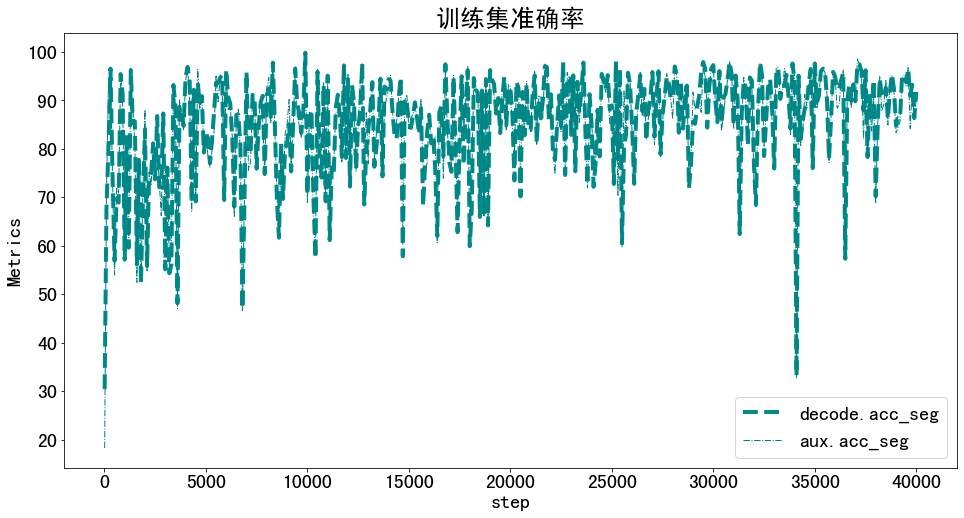

In [36]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [37]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [38]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

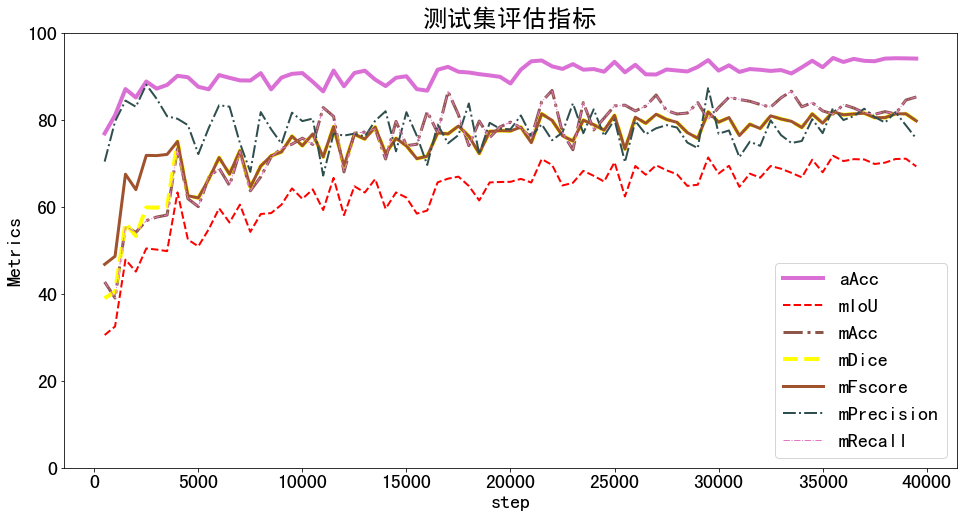

In [39]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()